In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [60]:
df=pd.read_csv('exams.csv')


In [61]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [62]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [63]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [65]:
df.describe()


,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [80]:
df.duplicated().sum()


np.int64(0)

In [81]:
df.drop_duplicates(inplace=True)


In [66]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  71
writing score                  74
dtype: int64

In [67]:
print("catogories in gender vairable :",end=" ")
print(df['gender'].unique())

print("catogories in race/ethnicity vairable :",end=" ")
print(df['race/ethnicity'].unique())

print("catogories in parental level of education vairable :",end=" ")
print(df['parental level of education'].unique())

print("catogories in lunch vairable :",end=" ")
print(df['lunch'].unique())

print("catogories in test preparation course vairable :",end=" ")
print(df['test preparation course'].unique())



catogories in gender vairable : ['female' 'male']
catogories in race/ethnicity vairable : ['group D' 'group B' 'group C' 'group E' 'group A']
catogories in parental level of education vairable : ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
catogories in lunch vairable : ['standard' 'free/reduced']
catogories in test preparation course vairable : ['completed' 'none']


In [68]:
#numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"we have {len(numeric_features)} numerical features : {numeric_features}")
print(f"we have {len(categorical_features)} categorical features : {categorical_features}")

we have 3 numerical features : ['math score', 'reading score', 'writing score']
we have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [69]:
#we will add columns for total score and average score
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score'] / 3
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


In [70]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full    = df[df['math score'] == 100]['average'].count()

print("number of students with full score in reading :",reading_full)
print("number of students with full score in writing :",writing_full)
print("number of students with full score in math :",math_full)

number of students with full score in reading : 10
number of students with full score in writing : 13
number of students with full score in math : 9


In [71]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print("number of students with less than 20 in reading :",reading_less_20)
print("number of students with less than 20 in writing :",writing_less_20)
print("number of students with less than 20 in math :",math_less_20)

number of students with less than 20 in reading : 0
number of students with less than 20 in writing : 2
number of students with less than 20 in math : 2


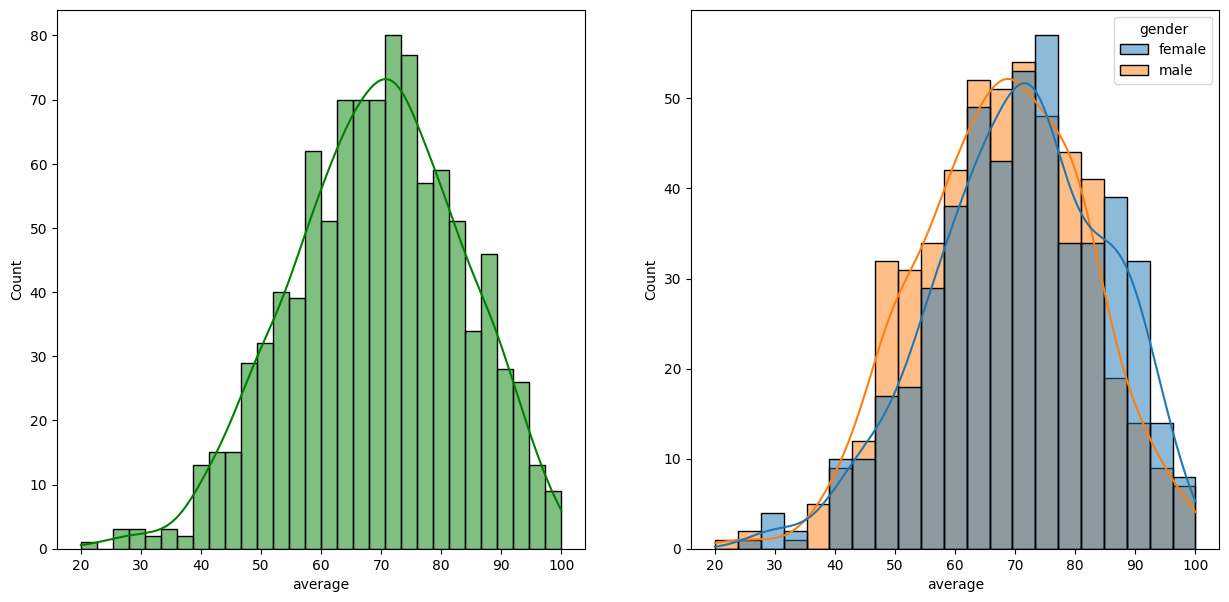

In [72]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x="average",kde=True,hue='gender')
plt.show()

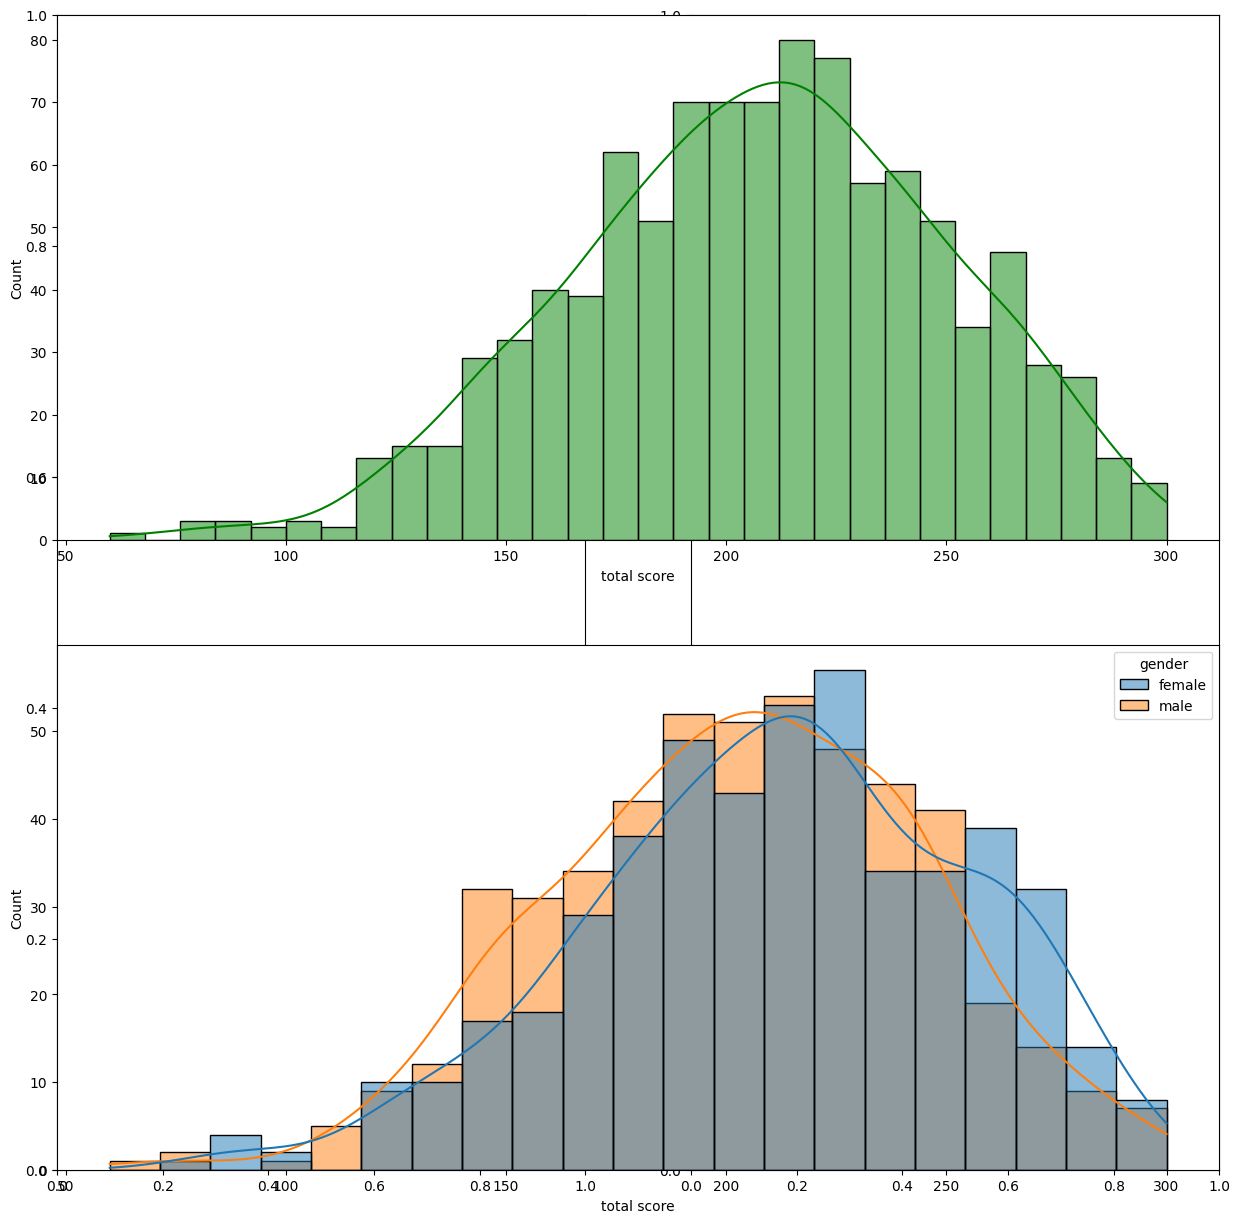

In [73]:
fig,axs=plt.subplots(1,2,figsize=(15,15))
plt.subplot(2,1,1)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(2,1,2)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()


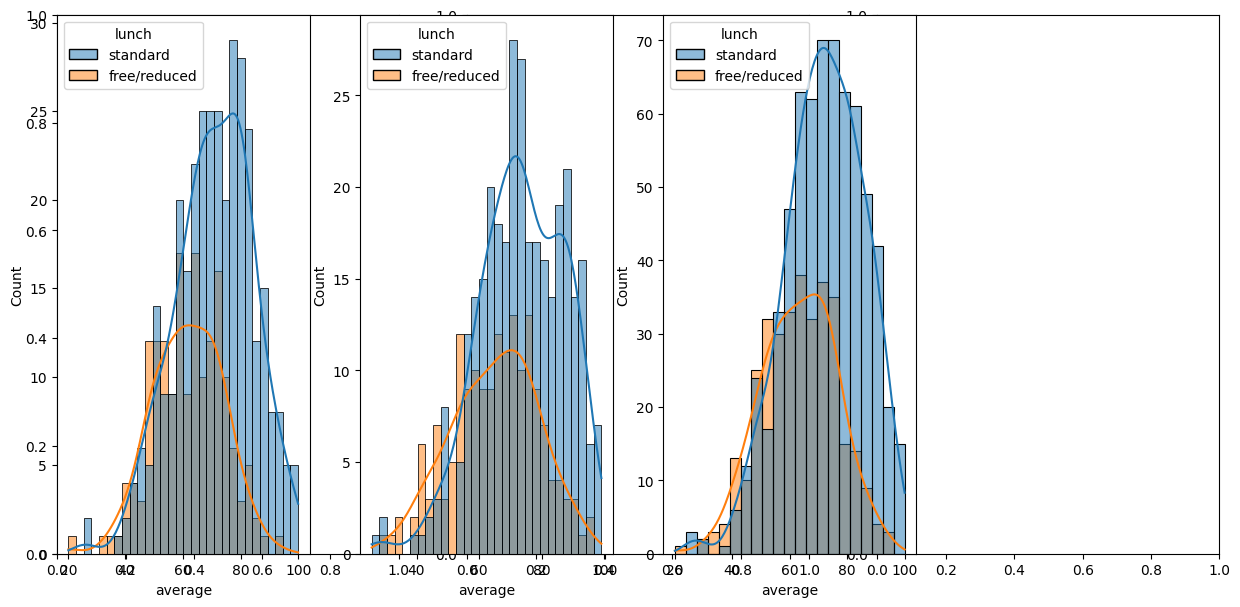

In [74]:
fig,axs=plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df[df.gender=='male'],x="average",bins=30,kde=True,color='b',hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x="average",bins=30,kde=True,color='r',hue='lunch')
plt.subplot(143)
sns.histplot(data=df,x='average',kde=True,hue='lunch')

plt.show()

Standard lunch helps in performing well in exam 
standard lunch helps in exam whether its a male or a female




In [75]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


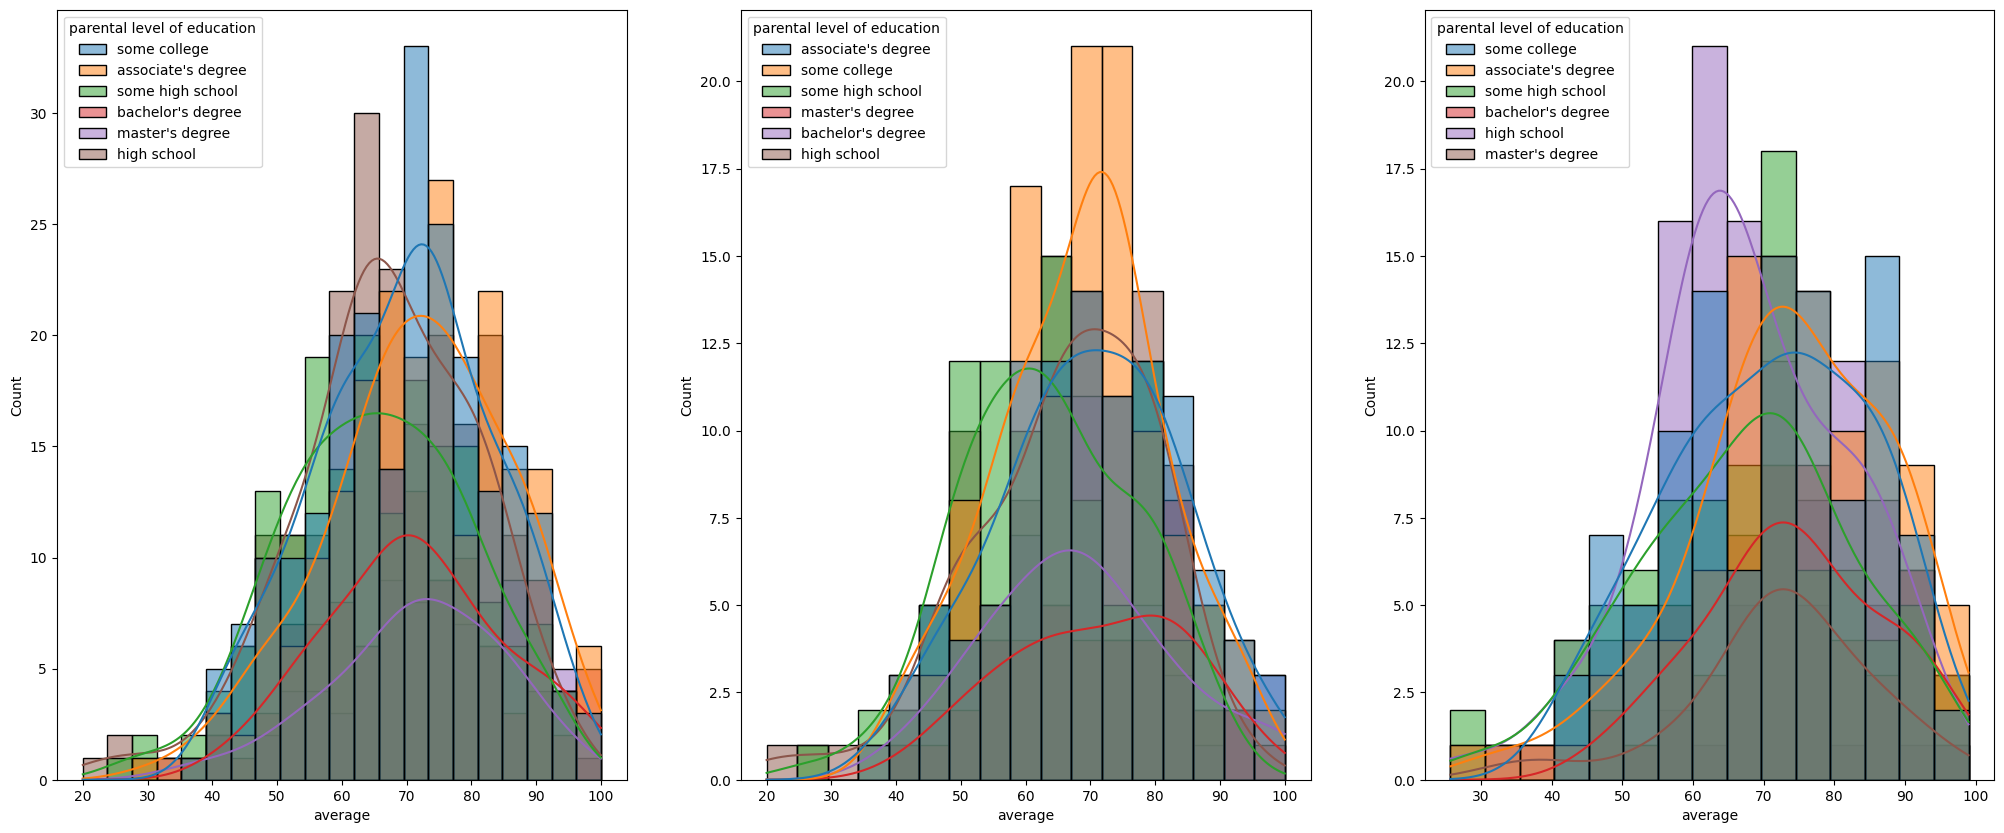

In [76]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
ax=sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(132)
ax=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
ax=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

1) in general parents education is not helping the students to perform well in the exam

2) 2nd plot shows that the parents with associate degree or master's degree their male child perform well in the exam 

3) 3rd plot we can say that there no effect of parents education on the female child

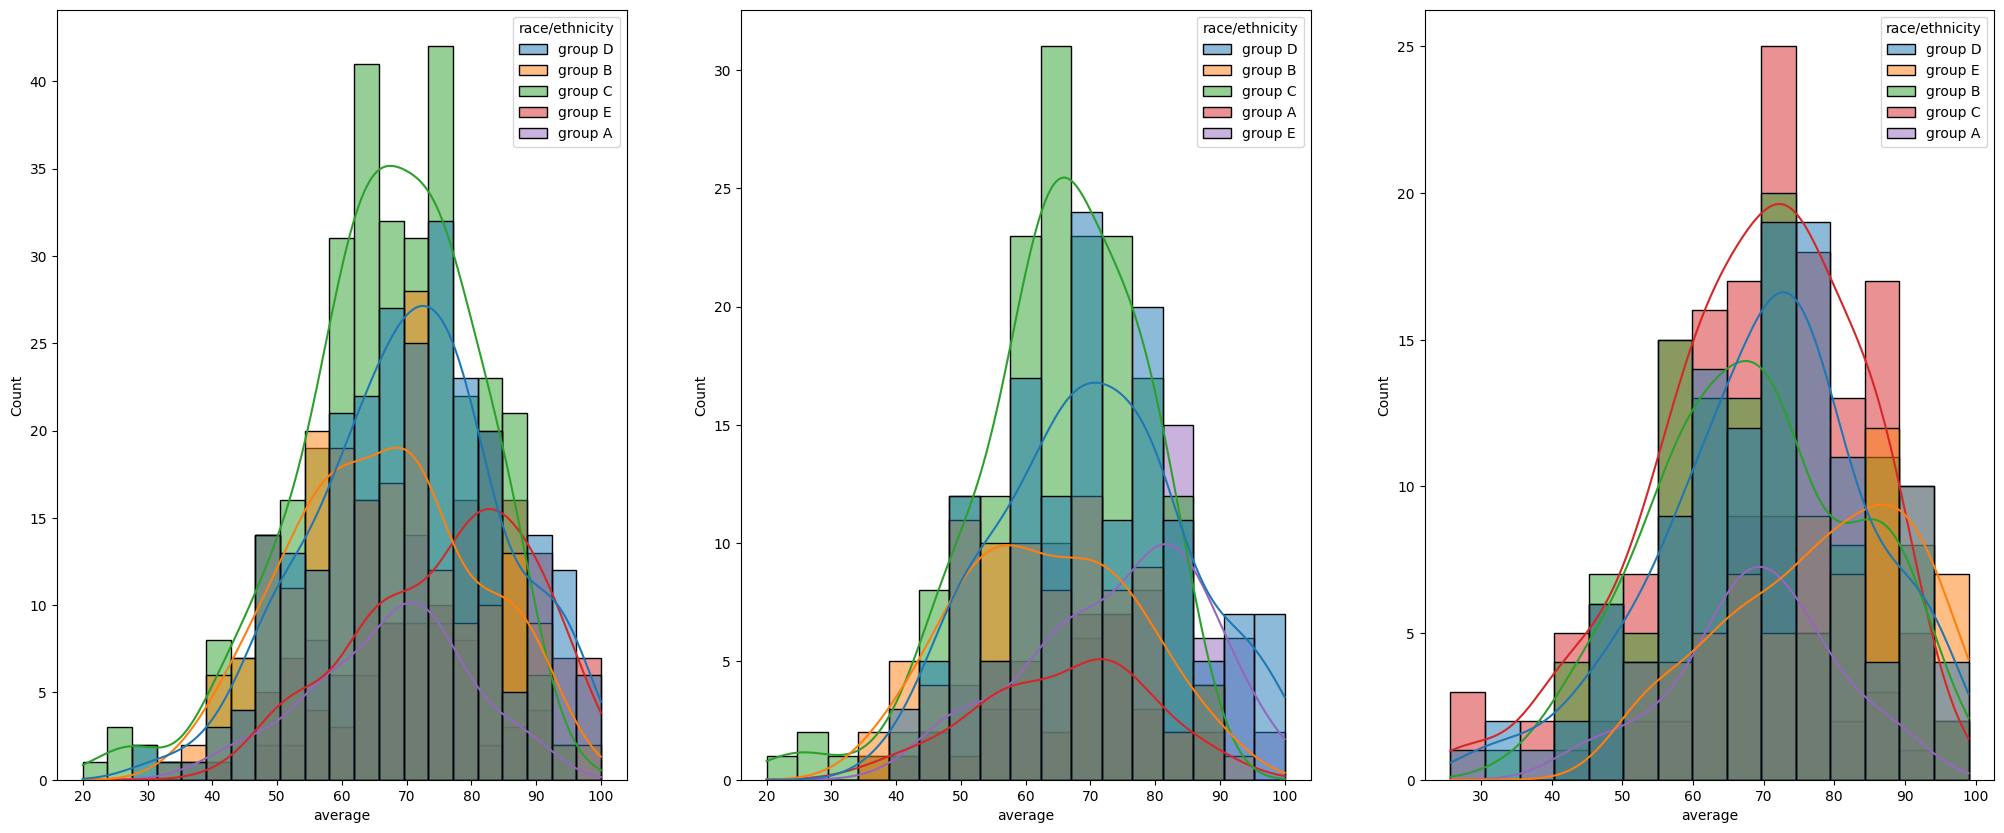

In [77]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
ax=sns.histplot(data=df,x="average",kde=True,hue='race/ethnicity')
plt.subplot(132)
ax=sns.histplot(data=df[df.gender=='male'],x="average",kde=True,hue='race/ethnicity')
plt.subplot(133)
ax=sns.histplot(data=df[df.gender=='female'],x="average",kde=True,hue='race/ethnicity')
plt.show()

1) student of group A and B tends to perform poorly in the exam 

2) Students of group A and B tends to perform poorly in the exam irrespective ofd the gender

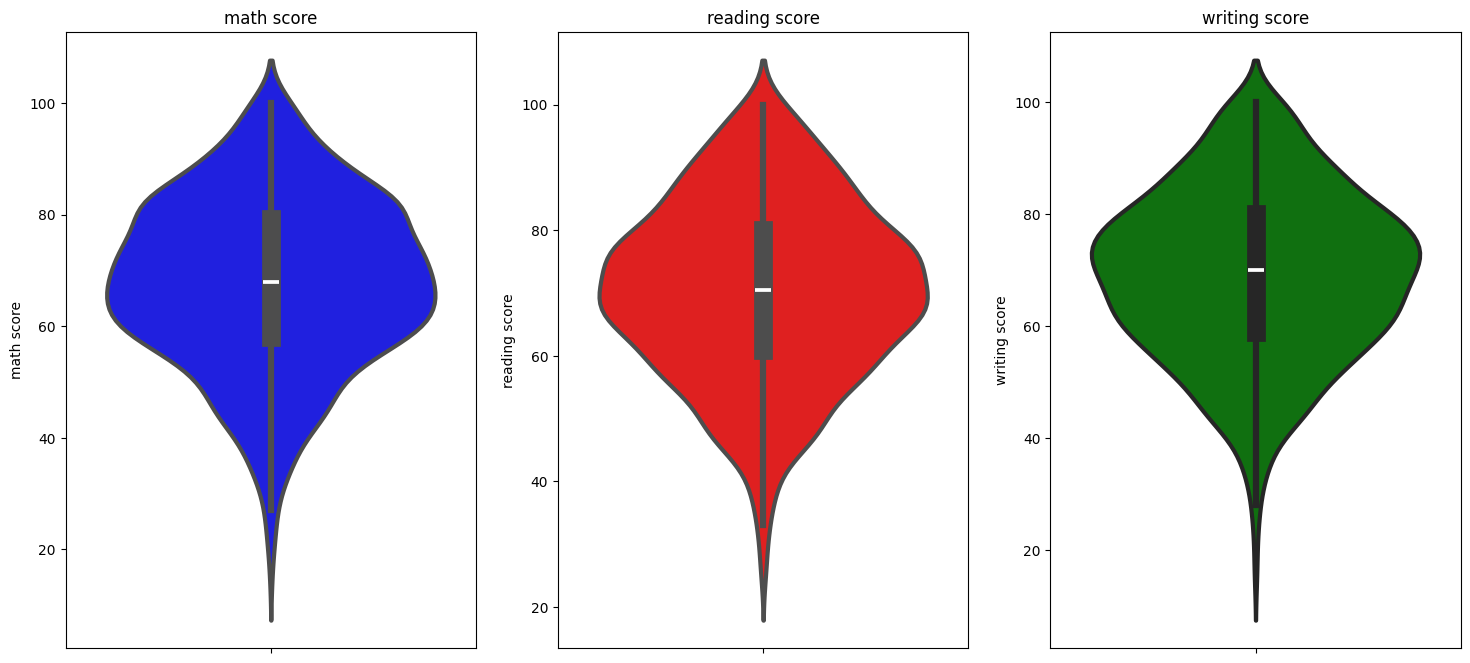

In [78]:
#maximum score of students in all 3 subjects
plt.figure(figsize=(18,8))
plt.subplot(131)
plt.title("math score")
sns.violinplot(y=df['math score'],color='b',linewidth=3)
plt.subplot(132)
plt.title("reading score")
sns.violinplot(y=df['reading score'],color='r',linewidth=3)
plt.subplot(133)
plt.title("writing score")
sns.violinplot(y=df['writing score'],color='g',linewidth=3)
plt.show()

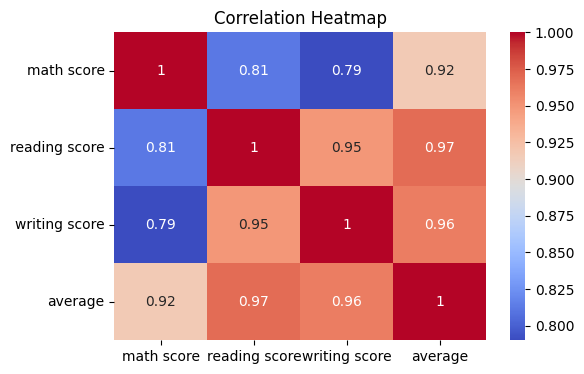

In [83]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[['math score','reading score','writing score','average']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.show()


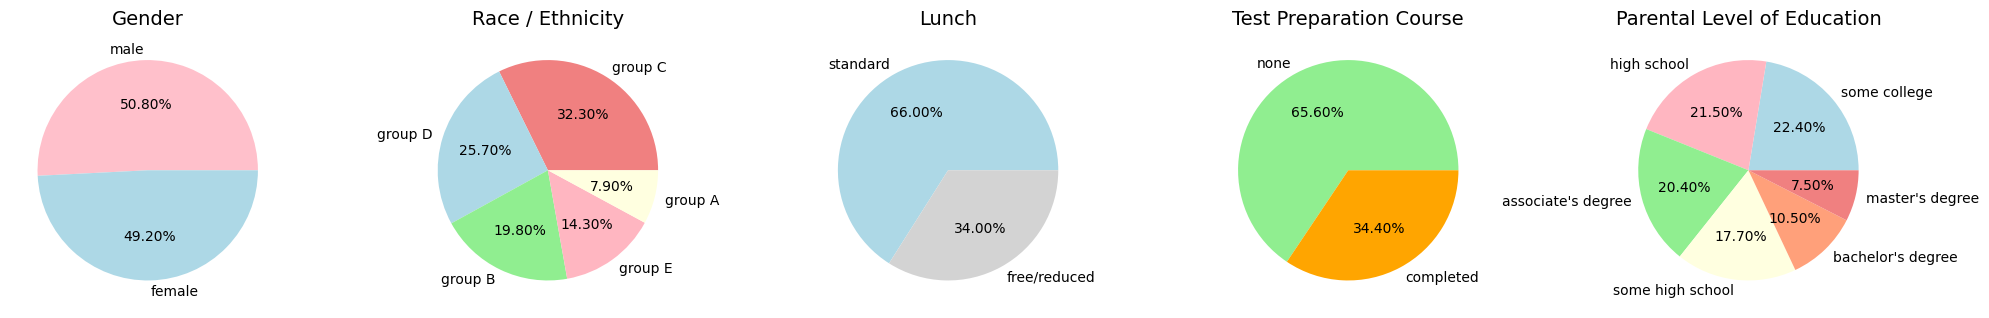

In [79]:
plt.figure(figsize=(20,6))

# Gender
plt.subplot(1,5,1)
size = df['gender'].value_counts()
plt.pie(
    size,
    labels=size.index,
    autopct='%0.2f%%',
    colors=['pink','lightblue']
)
plt.title("Gender", fontsize=14)
plt.axis("off")

# Race / Ethnicity
plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
plt.pie(
    size,
    labels=size.index,
    autopct='%0.2f%%',
    colors=['lightcoral','lightblue','lightgreen','lightpink','lightyellow']
)
plt.title("Race / Ethnicity", fontsize=14)
plt.axis("off")

# Lunch
plt.subplot(1,5,3)
size = df['lunch'].value_counts()
plt.pie(
    size,
    labels=size.index,
    autopct='%0.2f%%',
    colors=['lightblue','lightgrey']
)
plt.title("Lunch", fontsize=14)
plt.axis("off")

# Test preparation course
plt.subplot(1,5,4)
size = df['test preparation course'].value_counts()
plt.pie(
    size,
    labels=size.index,
    autopct='%0.2f%%',
    colors=['lightgreen','orange']
)
plt.title("Test Preparation Course", fontsize=14)
plt.axis("off")

# Parental level of education
plt.subplot(1,5,5)
size = df['parental level of education'].value_counts()
plt.pie(
    size,
    labels=size.index,
    autopct='%0.2f%%',
    colors=['lightblue','lightpink','lightgreen','lightyellow','lightsalmon','lightcoral']
)
plt.title("Parental Level of Education", fontsize=14)
plt.axis("off")

plt.tight_layout()
plt.show()


1) number of male and female students is almost equal 

2) number of students are greatest in grp c

3) no .of students who have stabndard lunch are greater 

4) number of students who have not enrolled in any tets prep course is greater 



The dataset contains student performance data with no missing values or duplicate records.
Feature engineering was performed by creating total and average scores.
Univariate and multivariate analysis show that students with standard lunch and those who completed test preparation courses perform better.
Strong positive correlation exists among math, reading, and writing scores.